<a href="https://colab.research.google.com/github/PedroDiehl/PedroDiehl/blob/main/TrabalhoIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Inteligência Artificial
## Universidade Federal de Pelotas
### Engenharia de Controle e Automação
### Professor: Elmer A. G. Peñaloza
### Grupo: Miguel Berno, Pedro Diehl e Rafael Trommer

# Processo do Machine Learning

O trabalho foi desenvolvido seguindo o fluxograma abaixo

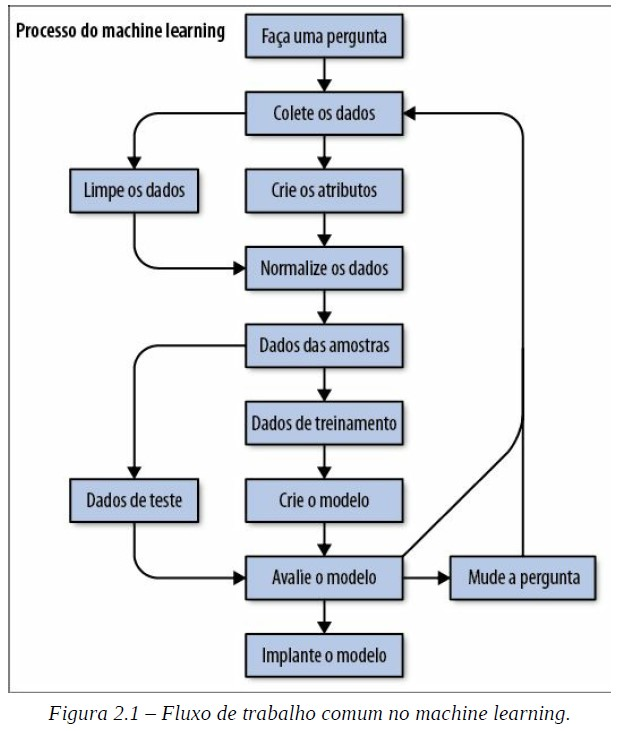

De acordo com Machine Learning - Guia de referência rápida - Trabalhando com dados estruturados em Python

# Faça uma pergunta


## Problemática enfretada


## Modelo aplicado

# Colete os dados

## [Banco de dados utilizado](https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant)
O conjunto de dados contém 9.568 pontos de dados coletados de uma usina de ciclo combinado ao longo de 6 anos (2006-2011), quando a usina foi configurada para funcionar com carga total.


Uma usina de ciclo combinado (*Combined Cycle Power Plant* - CCPP) é composta por turbinas a gás (GT), turbinas a vapor (ST) e geradores de vapor com recuperação de calor. Em um CCPP, a eletricidade é gerada por turbinas a gás e a vapor, que são combinadas em um ciclo, e é transferida de uma turbina para outra.

## Informações dos atributos
Os recursos consistem em variáveis de ambiente médias por hora
- Temperatura (T) na faixa de 1,81°C e 37,11°C,
- Pressão Ambiente (AP) na faixa de 992,89-1033,30 milibar,
- Umidade relativa (UR) na faixa de 25,56% a 100,16%
- Vácuo de exaustão (V) na faixa de 25,36-81,56 cm Hg
- Produção de energia elétrica horária líquida (EP) 420,26-495,76 MW


As médias são tiradas de vários sensores localizados ao redor da planta que registram as variáveis ambientais a cada segundo. 

**As variáveis são dadas sem normalização.**

## Biblioteca [pandas](https://pandas.pydata.org/docs/#) 
É uma biblioteca de código aberto licenciada pela BSD que fornece estruturas de dados fáceis de usar e de alto desempenho além de ferramentas de análise de dados para a linguagem de programação Python.


In [ ]:
import pandas as pd


DATASET_URL = "https://raw.githubusercontent.com/PedroDiehl/trabalho-ia/main/Dataset/CCPP_dataset.csv"

df = pd.read_csv(DATASET_URL, sep=';')

df.head()

,TEMPERATURE,EXHAUST VACUUM,AMBIENT PRESSURE,RELATIVE HUMIDITY,ENERGY OUTPUT
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Limpe os dados

Primeiramente, realizou-se uma renomeação das colunas para aumentar a clareza na hora de manipular as informações contidas no dataset utilizado.

## Biblioteca [janitor](https://pyjanitor-devs.github.io/pyjanitor/)
É uma implementação Python do janitor do pacote R e fornece uma API para limpar os dados.

Utilizada para atribuir nomes corretos para as colunas.

Utilizado para ter uma visão de dados faltantes nas colunas.


## Biblioteca [ydata_profiling](https://pypi.org/project/pandas-profiling/)
O principal objetivo é fornecer uma experiência de análise exploratória de dados (EDA) de uma linha em uma solução consistente e rápida. Como a função pandas df.describe(), que é tão útil, o ydata-profiling oferece uma análise estendida de um DataFrame enquanto permite que a análise de dados seja exportada em diferentes formatos, como html e json.

O pacote gera uma análise simples e resumida de um conjunto de dados, incluindo séries temporais e texto.



In [ ]:
!pip install pyjanitor

In [ ]:
import janitor as jn


df = jn.clean_names(df)

if not df.isna().any().any():
  print("Dataframe sem valores ausentes")
else:
  print("Dataframe possui valores ausentes")

df.head()

Dataframe sem valores ausentes


,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

full_report = True #@param {type:"boolean"}

if full_report:
  ProfileReport(df, title="CCPP Profiling Report").to_notebook_iframe()
else:
  print(df.describe())

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]